IMPORTING ALL IMPORTANT LIABRARY
**bold text**

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Load IRIS DATASET

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# To get basic info about dats

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Print summary statistics

print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
# Demonstrate class of each sample

iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

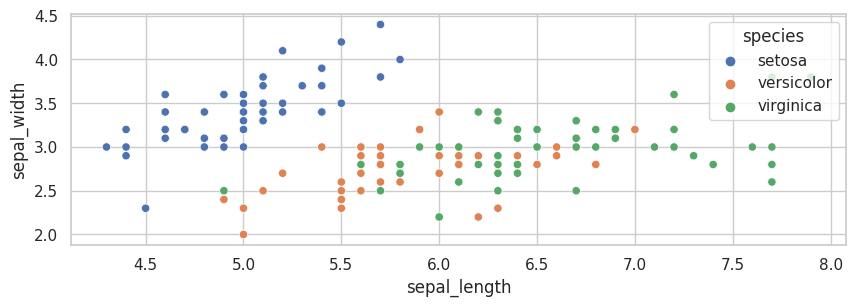

In [ ]:
# SEPAL LENGHT & SEPAL WIDTH of DIFFERENT EACH SPECIS FROM OTHER (SCATTER PLOT)

plt.figure(figsize = (10, 3) , dpi = 100 )
sns.set_style("whitegrid")
sns.scatterplot(data = iris , x = "sepal_length" , y = "sepal_width" , hue =  "species")

<Axes: xlabel='petal_length', ylabel='petal_width'>

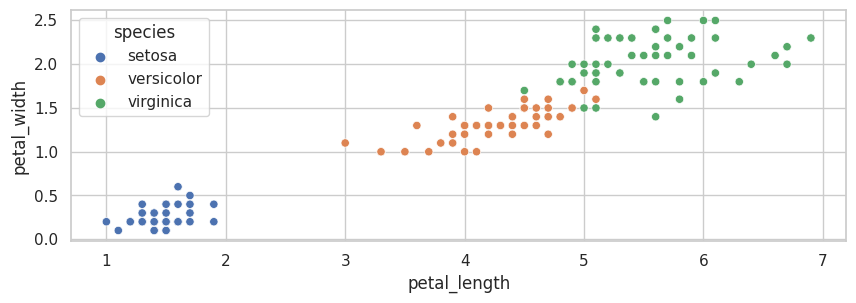

In [ ]:
# PETAL LENGHT & PETAL WIDTH of DIFFERENT EACH SPECIS FROM OTHER (SCATTER PLOT)

plt.figure(figsize = (10, 3) , dpi = 100 )
sns.set_style("whitegrid")
sns.scatterplot(data = iris , x = "petal_length" , y = "petal_width" , hue =  "species")

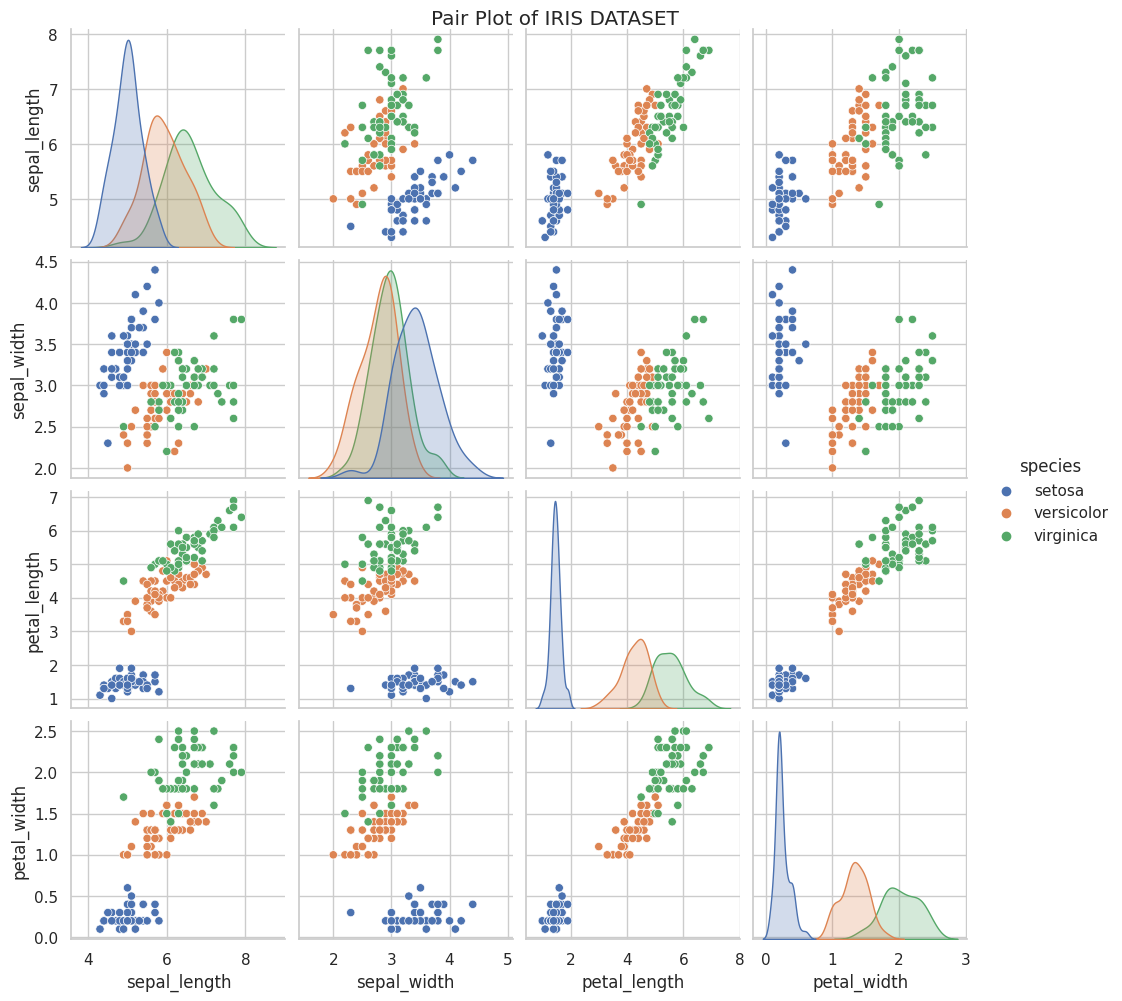

In [ ]:
# DATA VISUALISATION (PAIR PLOT)

sns.pairplot(iris , hue = "species" , palette = "deep" , diag_kind = "kde")
sns.set_theme(style = "darkgrid")
plt. suptitle("Pair Plot of IRIS DATASET" , y = 1)
plt.show()

<ipython-input-38-b87ca6490419>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris.corr()


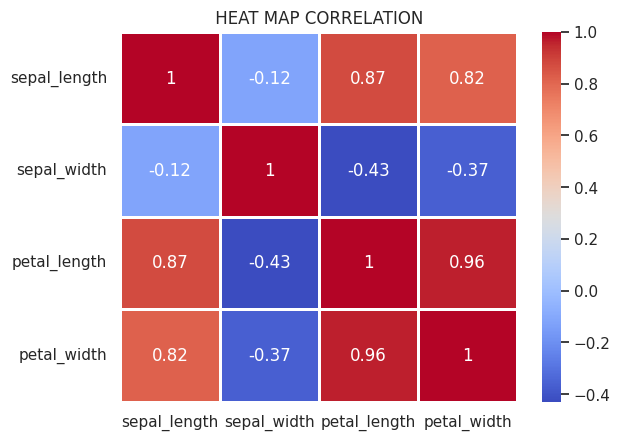

In [ ]:
# HEAT MAP CORRELATION

correlation_matrix = iris.corr()
sns.heatmap(correlation_matrix , annot = True , cmap = "coolwarm" , linewidths = 1, cbar = True)
plt.title(" HEAT MAP CORRELATION ")
plt.show()

Text(0.5, 1, 'IRIS FLOWER INFO')

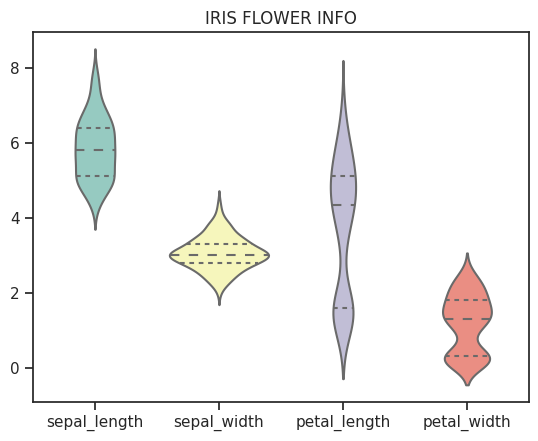

In [ ]:
# Creating Violinplot Plot

sns.set_theme(style = "ticks")
sns.violinplot(data = iris , inner = "quartile" , palette = "Set3" )
plt.title("IRIS FLOWER INFO" , y = 1)

Text(0.5, 1.0, 'COMPARISION B/W SEPAL LENGHT AND SPECIES')

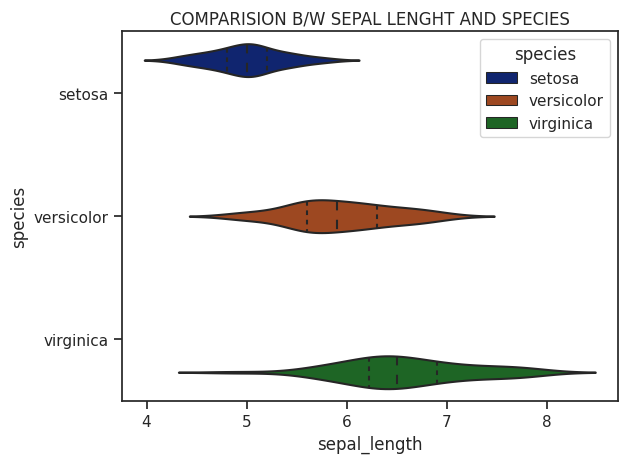

In [ ]:
# Create split VIOLIN to compare the across the hue variable

sns.violinplot(data = iris , x = "sepal_length", y = "species" , inner = "quartile"
               , palette= "dark" , split = False , hue = "species")
sns.set_theme(style = "ticks")
plt.title("COMPARISION B/W SEPAL LENGHT AND SPECIES")

Text(0.5, 1.0, 'COMPARISION B/W SEPAL WIDTH AND SPECIES')

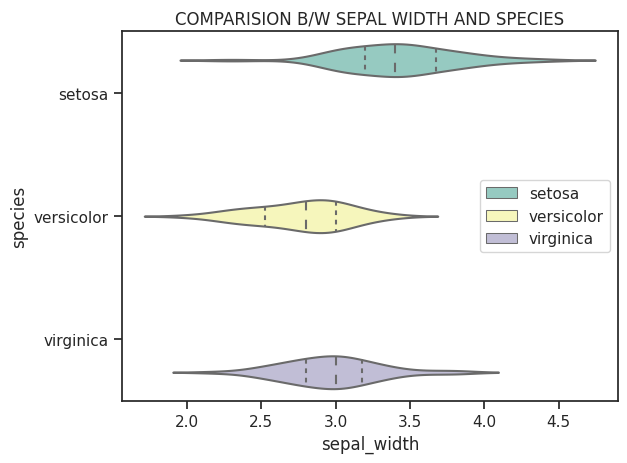

In [ ]:
sns.violinplot(data = iris , x = "sepal_width", y = "species" , inner = "quartile"
               , palette= "Set3" , split = False , hue = "species")
sns.set_theme(style = "ticks")
plt.legend(loc = "center right")
plt.title("COMPARISION B/W SEPAL WIDTH AND SPECIES")

Text(0.5, 1.0, 'COMPARISION B/W Petal Length AND SPECIES')

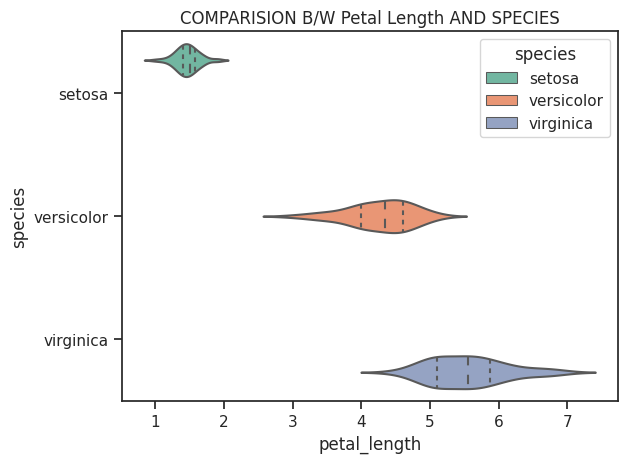

In [ ]:
sns.violinplot(data = iris , x = "petal_length", y = "species" , inner = "quartile"
               , palette= "Set2" , split = False , hue = "species")
sns.set_theme(style = "ticks")
plt.title("COMPARISION B/W Petal Length AND SPECIES")

Text(0.5, 1.0, 'COMPARISION B/W Petal Width AND SPECIES')

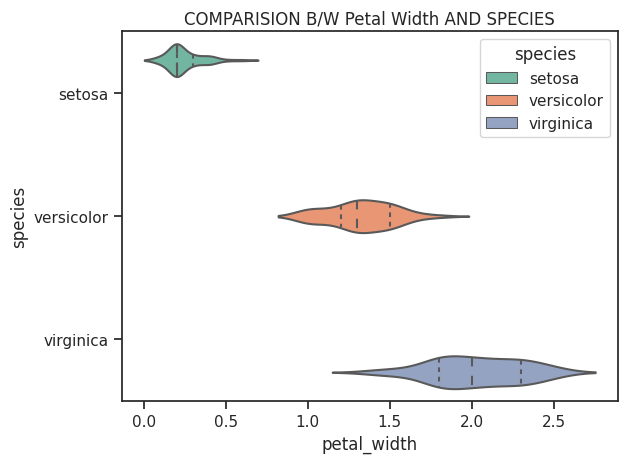

In [ ]:
sns.violinplot(data = iris , x = "petal_width", y = "species" , inner = "quartile"
               , palette= "Set2" , split = False , hue = "species")
sns.set_theme(style = "ticks")
plt.title("COMPARISION B/W Petal Width AND SPECIES")

In [ ]:
# Seperate the feature and the Target Variable

A = iris.drop("species" , axis=1)
y = iris["species"]

# Encode a variable ith a categorical taret

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Prepare the data

x = iris.drop("species" , axis = 1)
y = iris["species"]
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.25)

In [ ]:
# Machine Learing Algorithim to use

model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Train the model

model = LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

In [ ]:
# Evaluate the model in the given dataset

score = model.score(x_test , y_test)
print("The accuracy of the model is:" , score)


The accuracy of the model is: 0.9736842105263158


In [ ]:

# Making prediction on the data

new_data = np.array([[5.2 , 3.1 , 3.1 , 0.28]])
prediction = model.predict(new_data)
print("The predict species for the new data is:" , prediction)

The predict species for the new data is: ['versicolor']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
